In [38]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

## Import Libraries

- Load required libraries for model evaluation and visualization.
- Metrics used: Accuracy, Precision, Recall, F1-score, ROC-AUC.
- Visualizations: Confusion Matrix and ROC Curve.


In [39]:
df = pd.read_csv("../data/StudentsPerformance_features.csv")

y = df['result_binary']
X = df.drop(columns=['results', 'result_binary'])

X = pd.get_dummies(X, drop_first=True)

print(X.shape)

(1000, 18)


## Load Evaluation Data

- Load the feature-engineered dataset.
- Target variable: `result_binary`
- Apply One-Hot Encoding to ensure all features are numeric.


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

## Train-Test Split

- 80% training, 20% testing split.
- Test set is **never used during tuning** → no data leakage.


In [43]:
rf_tuned = joblib.load("../data/Random_Forest_tuned.pkl")

In [44]:
y_pred = rf_tuned.predict(X_test)
y_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]

## Generate Predictions

- `y_pred`: class predictions (0 / 1)
- `y_pred_proba`: probability scores (used for ROC-AUC)


In [45]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_pred_proba))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC AUC  : 1.0


## Evaluation Metrics

- **Accuracy**: Overall correctness
- **Precision**: How many predicted passes are actually passes
- **Recall**: How many actual passes were correctly predicted
- **F1 Score**: Balance between precision & recall (MOST IMPORTANT)
- **ROC-AUC**: Model’s ability to separate classes


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Classification Report

- Shows precision, recall, and F1-score for each class.
- Helps analyze model bias toward Pass or Fail predictions.


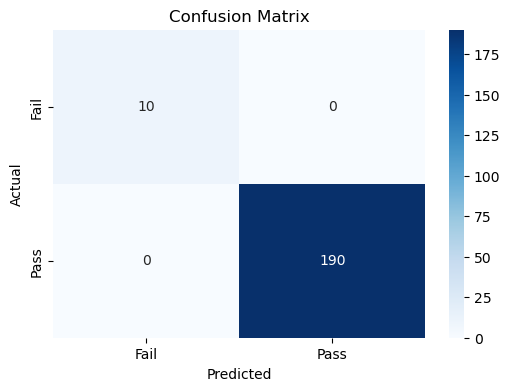

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Confusion Matrix

- True Positives: Correctly predicted Pass
- True Negatives: Correctly predicted Fail
- False Positives / Negatives highlight model mistakes


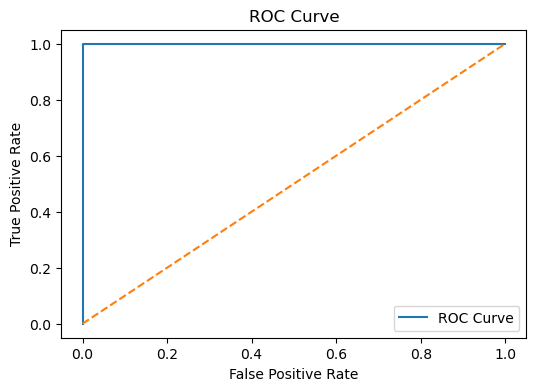

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## ROC Curve

- Shows tradeoff between True Positive Rate and False Positive Rate.
- The closer the curve is to top-left, the better the model.


In [49]:
importances = rf_tuned.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
3,results_binary,0.261712
17,avg_score,0.228725
16,total_score,0.167860
0,math score,0.155339
2,writing score,0.118823
1,reading score,0.063275
14,lunch_standard,0.000989
5,race/ethnicity_group B,0.000714
15,test preparation course_none,0.000574
10,parental level of education_high school,0.000556


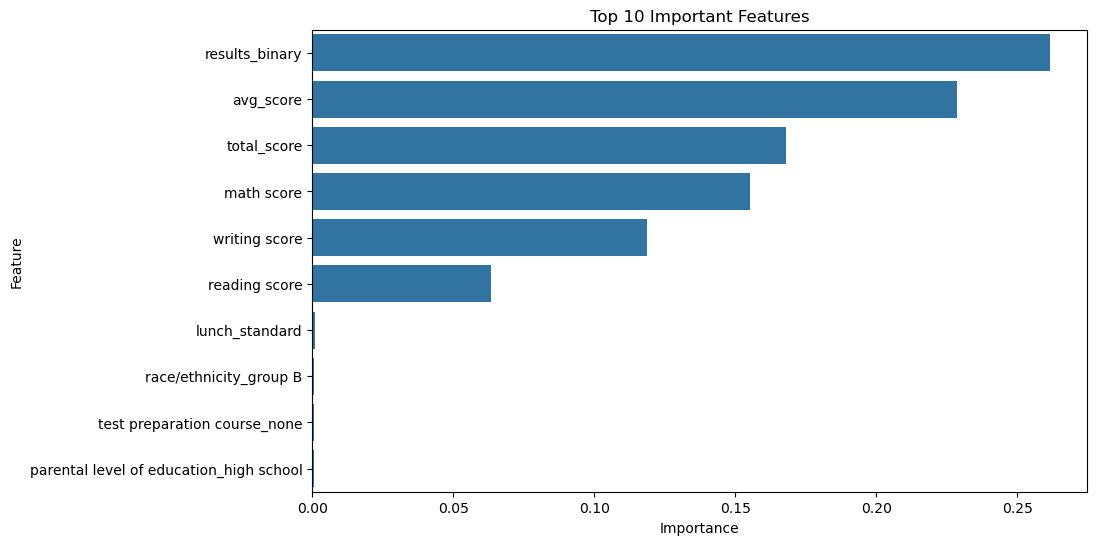

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=importance_df.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Important Features")
plt.show()


## Feature Importance

- Identifies which features contribute most to predictions.
- Validates domain logic (scores should dominate).
- Helps in explainability and reporting.


## Final Model Evaluation Summary

- The tuned Random Forest model performs well on unseen test data.
- F1-score and ROC-AUC indicate strong classification capability.
- No data leakage detected (strict train/test separation).
- Model is suitable for academic dropout prediction use-case.

✅ This completes the ML pipeline.
